# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [8]:
import json
import pandas as pd
import numpy as np
import requests
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

chat = open('data/result.json', encoding='utf8')
data = json.load(chat)

msgs = data['messages']
dmain = pd.DataFrame(msgs)

df = dmain.filter(items = ['id','from', 'reply_to_message_id' ,'text'])

df

,id,from,reply_to_message_id,text
0,1055,NaN,NaN,
1,1056,NaN,NaN,
2,1057,NaN,NaN,
3,1058,NaN,NaN,
4,1059,NaN,NaN,
...,...,...,...,...
89,1207,Gabriel Arenas 🇦🇷,NaN,Les dejo los links a videos y material en PowerBi
90,1208,Gabriel Arenas 🇦🇷,NaN,"[El video que vimos: , {'type': 'link', 'text'..."
91,1209,Gabriel Arenas 🇦🇷,NaN,"[Este otro ejemplo del que les hable, panel d..."
92,1210,Gabriel Arenas 🇦🇷,NaN,"[En esta página, encuentran datasets de difer..."


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   94 non-null     int64  
 1   from                 75 non-null     object 
 2   reply_to_message_id  8 non-null      float64
 3   text                 94 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [10]:
missing = []
for column in dataframe.columns:
    attribute = {}
    attribute["column"] = column
    # Obtener promedio de valores nulos para la columna
    attribute["percentage"] = np.mean(dataframe[column].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    attribute["quantity"] = np.sum(dataframe[column].isnull())
    missing.append(attribute)  

# Convertir lista de diccionarios en dataframe
missing_df = pd.DataFrame(missing)

missing_df

,column,percentage,quantity
0,id,0.000000,0
1,from,20.212766,19
2,reply_to_message_id,91.489362,86
3,text,0.000000,0


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

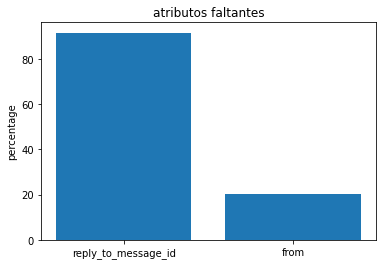

In [13]:
missing_df = missing_df.sort_values('percentage', ascending=False)

df_new_p = missing_df.loc[(missing_df['percentage'] > 0)]

plt.bar(df_new_p["column"], df_new_p["percentage"])
plt.ylabel('percentage')
plt.title('atributos faltantes')
plt.show()

In [14]:
dataframe_global = dataframe.copy(deep=False)
media = dataframe_global['reply_to_message_id'].mean()
dataframe_global['reply_to_message_id'] = dataframe_global['reply_to_message_id'].fillna(media)
dataframe_global['from'] = dataframe_global['from'].fillna('user')
dataframe_global

,id,from,reply_to_message_id,text
0,1055,user,1093.125,
1,1056,user,1093.125,
2,1057,user,1093.125,
3,1058,user,1093.125,
4,1059,user,1093.125,
...,...,...,...,...
89,1207,Gabriel Arenas 🇦🇷,1093.125,Les dejo los links a videos y material en PowerBi
90,1208,Gabriel Arenas 🇦🇷,1093.125,"[El video que vimos: , {'type': 'link', 'text'..."
91,1209,Gabriel Arenas 🇦🇷,1093.125,"[Este otro ejemplo del que les hable, panel d..."
92,1210,Gabriel Arenas 🇦🇷,1093.125,"[En esta página, encuentran datasets de difer..."


In [15]:

missing = []

for column in dataframe.columns:
    attribute = {}
    attribute["column"] = column
    attribute["percentage"] = np.mean(dataframe_global[column].isnull())*100
    attribute["quantity"] = np.sum(dataframe_global[column].isnull())
    missing.append(attribute)  

missing_df = pd.DataFrame(missing)
missing_df

,column,percentage,quantity
0,id,0.0,0
1,from,0.0,0
2,reply_to_message_id,0.0,0
3,text,0.0,0


## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [16]:
df.describe()


,id,reply_to_message_id
count,94.000000,8.000000
mean,1132.414894,1093.125000
std,53.922567,26.930798
min,1055.000000,1078.000000
25%,1079.250000,1081.500000
50%,1156.500000,1083.500000
75%,1179.750000,1089.250000
max,1219.000000,1159.000000


- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

In [17]:

Q1 = dataframe_global.quantile(0.25)
Q3 = dataframe_global.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                     100.5
reply_to_message_id      0.0
dtype: float64


In [18]:
lower_rank = Q1 - 1.5 * IQR
upper_rank = Q3 + 1.5 * IQR

In [19]:
df_outliers = (dataframe_global < lower_rank) | (dataframe_global > upper_rank)
df_outliers

<ipython-input-19-8bb7d9213e0a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (dataframe_global < lower_rank) | (dataframe_global > upper_rank)


,from,id,reply_to_message_id,text
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
89,False,False,False,False
90,False,False,False,False
91,False,False,False,False
92,False,False,False,False


<AxesSubplot:>

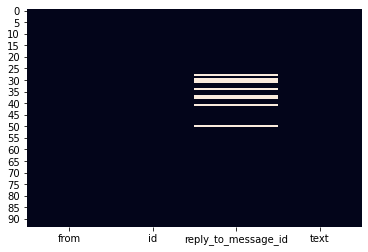

In [20]:
sns.heatmap(df_outliers, cbar=False)